In [1]:
import ehc_sn as ehc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
! python main.py --map="example" --output-file="episode_example"

pygame 2.6.1 (SDL 2.28.4, Python 3.12.8)
Hello from the pygame community. https://www.pygame.org/contribute.html
INFO:__main__:Getting map environment: example
INFO:__main__:Starting manual control
pressed right
step=1, reward=0.00
pressed up
step=2, reward=0.00
pressed left
step=3, reward=0.00
pressed up
step=4, reward=0.00
pressed right
step=5, reward=0.00
pressed up
step=6, reward=0.00
pressed left
step=7, reward=0.00
pressed up
step=8, reward=0.00
pressed right
step=9, reward=0.00
pressed up
step=10, reward=0.00
pressed up
step=11, reward=0.00
pressed up
step=12, reward=0.00
pressed up
step=13, reward=0.00
pressed left
step=14, reward=0.00
pressed up
step=15, reward=0.00
pressed right
step=16, reward=0.00
pressed up
step=17, reward=0.00
pressed up
step=18, reward=0.00
pressed left
step=19, reward=0.00
pressed up
step=20, reward=0.00
pressed up
step=21, reward=0.00
pressed left
step=22, reward=0.00
pressed up
step=23, reward=0.00
pressed up
step=24, reward=0.00
pressed right
step=25

In [2]:
episodes = np.load("data/episode_example.npy", allow_pickle=True)
episodes.shape

(3,)

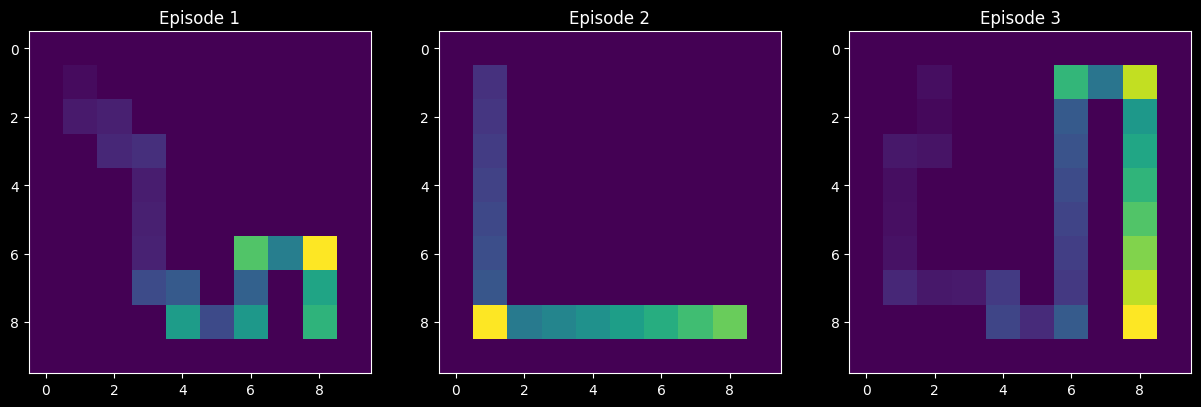

In [3]:
plt.figure(figsize=(15, 5))
for n, episode in enumerate(episodes):
    plt.subplot(1, len(episodes), n + 1)
    y = ehc.get_trajectory(episode, δ=0.9)
    plt.imshow(y.T, cmap="viridis")
    plt.title(f"Episode {n+1}")
plt.show()

In [4]:
parameters = ehc.HGModelParams(δ=0.8, τ=0.1, c=0.4)
model = ehc.HierarchicalGenerativeModel([1.0], 100, parameters)

/home/borja/projects/spatial-navigation/ehc-sn/src/ehc_sn/__init__.py:160: RuntimeWarning: divide by zero encountered in log
  Θ[k].θ = (1 - λ) * Θ[k].θ - kron_delta(ξ_i, np.log(x))  # Eq. (13)
/home/borja/projects/spatial-navigation/ehc-sn/src/ehc_sn/__init__.py:160: RuntimeWarning: invalid value encountered in log
  Θ[k].θ = (1 - λ) * Θ[k].θ - kron_delta(ξ_i, np.log(x))  # Eq. (13)


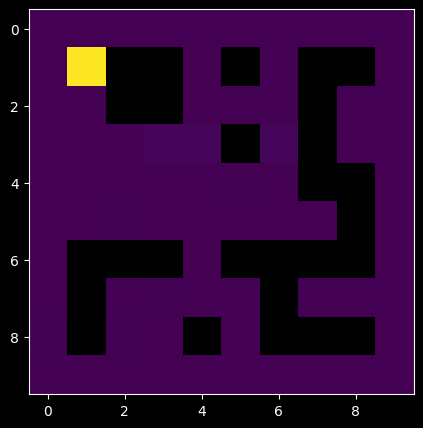

In [5]:
Θ = model.learning(episode=[e.reshape(e.shape[0], -1) for e in episodes])

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(Θ[0].θ.reshape(10, 10), cmap="viridis")

In [6]:
Θ[0].θ

array([1.72430773e-01, 1.97185161e+00, 2.85747316e-01, 3.99270056e-02,
       5.98924805e-01, 2.03953703e+00, 1.94370482e+00, 5.99440572e-01,
       2.40690336e-01, 4.74340835e-03, 5.74450688e-01, 6.37844827e+02,
                  nan,            nan, 3.10750500e-01,            nan,
       1.98220564e-01,            nan,            nan, 4.74890222e-01,
       2.16916464e+00, 6.29730910e-02,            nan,            nan,
       7.20914591e-01, 2.31675282e+00, 9.66752898e-02,            nan,
       1.29217493e+00, 4.84699051e-01, 9.81797295e-03, 5.35191941e-01,
       1.12681939e-01, 8.48890888e+00, 9.17278229e+00,            nan,
       9.25086033e+00,            nan, 1.72031669e-01, 5.77295617e-01,
       3.59622402e-01, 5.93260750e-01, 1.22370796e-01, 1.81185241e+00,
       2.30720862e+00, 3.53249829e+00, 3.34685779e-01,            nan,
                  nan, 1.05810049e-01, 3.76854176e-02, 6.12750806e-02,
       2.58146356e+00, 1.10151506e+00, 3.21500240e-01, 1.37859351e-01,
      